## Data Cleaning

Import neceessary libraries.

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

sns.set_style(style = 'whitegrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Reads in train data from `datasets` folder.

In [3]:
train = pd.read_csv('../datasets/train.csv')

Rename all columns to be in snake case.

In [4]:
train.columns = train.columns.str.lower()
train.columns = train.columns.str.replace(' ', '_')

Check if there are `NaN` values and sort them in descending order.

In [5]:
train.isnull().sum().sort_values(ascending = False).head(30)

pool_qc           2042
misc_feature      1986
alley             1911
fence             1651
fireplace_qu      1000
lot_frontage       330
garage_finish      114
garage_qual        114
garage_yr_blt      114
garage_cond        114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmtfin_type_1      55
bsmt_cond           55
bsmt_qual           55
mas_vnr_area        22
mas_vnr_type        22
bsmt_half_bath       2
bsmt_full_bath       2
garage_area          1
total_bsmt_sf        1
bsmt_unf_sf          1
bsmtfin_sf_2         1
bsmtfin_sf_1         1
garage_cars          1
mo_sold              0
sale_type            0
full_bath            0
half_bath            0
dtype: int64

Check the statistics summary for all of the numerical columns.

In [6]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2051.0,1.474034e+03,8.439808e+02,1.0,753.5,1486.0,2.198000e+03,2930.0
pid,2051.0,7.135900e+08,1.886918e+08,526301100.0,528458140.0,535453200.0,9.071801e+08,924152030.0
ms_subclass,2051.0,5.700878e+01,4.282422e+01,20.0,20.0,50.0,7.000000e+01,190.0
lot_frontage,1721.0,6.905520e+01,2.326065e+01,21.0,58.0,68.0,8.000000e+01,313.0
lot_area,2051.0,1.006521e+04,6.742489e+03,1300.0,7500.0,9430.0,1.151350e+04,159000.0
overall_qual,2051.0,6.112140e+00,1.426271e+00,1.0,5.0,6.0,7.000000e+00,10.0
overall_cond,2051.0,5.562165e+00,1.104497e+00,1.0,5.0,5.0,6.000000e+00,9.0
year_built,2051.0,1.971709e+03,3.017789e+01,1872.0,1953.5,1974.0,2.001000e+03,2010.0
year_remod/add,2051.0,1.984190e+03,2.103625e+01,1950.0,1964.5,1993.0,2.004000e+03,2010.0
mas_vnr_area,2029.0,9.969591e+01,1.749631e+02,0.0,0.0,0.0,1.610000e+02,1600.0


>For the columns that are numerically meaningful, I notice that most of them have a high standard deviation, which means the data are spread from the mean. Correspondingly, those columns also have outliers based on the min and max values.

### Handling `NaN` values.

When inspecting `NaN` values, I noticed that there is a garage type row that is missing all garage values except one. I isolated this row and dropped it from my training data.
>  
`
garage_finish      114
garage_cond        114
garage_qual        114
garage_yr_blt      114
garage_type        113
`

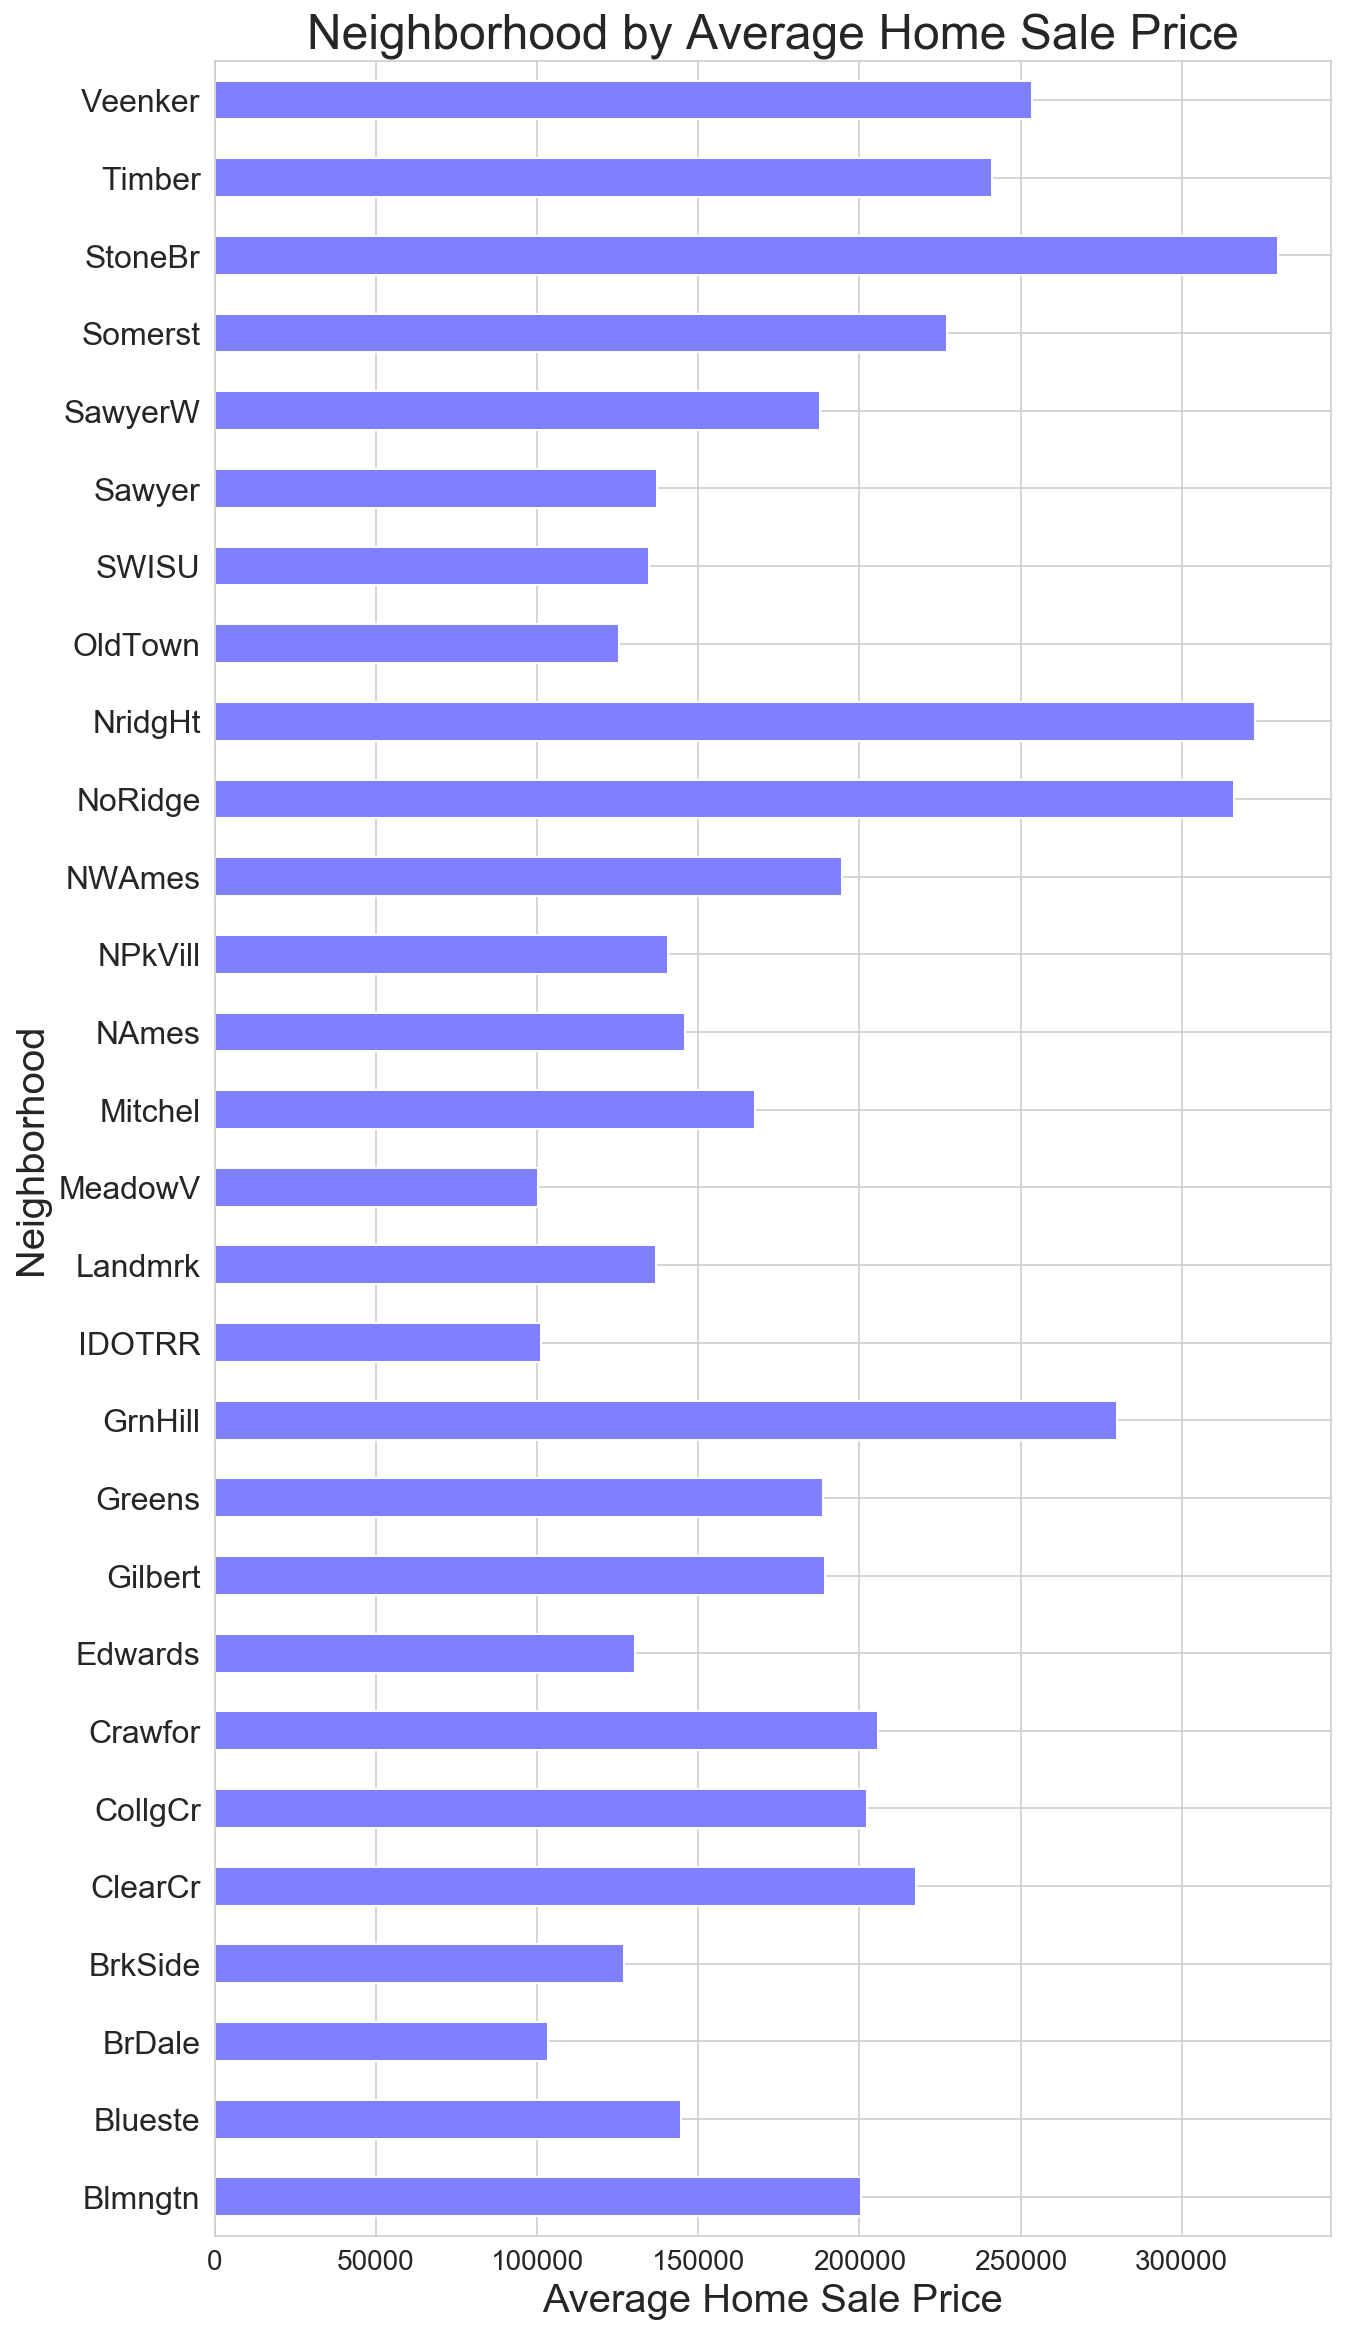

In [9]:
plt.figure(figsize=(10,20))
train.groupby('neighborhood')['saleprice'].mean().plot(kind='barh', color = '#7F7FFF')
plt.title('Neighborhood by Average Home Sale Price', fontsize=24)
plt.xlabel('Average Home Sale Price', fontsize=20)
plt.ylabel('Neighborhood', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.savefig('../images/neighborhood_avg_sale_price.png');

In [5]:
# isolate the row with all garage columns null except one
garage_df = train.loc[:, train.columns.str.contains('garage')]

nulls = garage_df[garage_df['garage_finish'].isna()]
nulls[~nulls['garage_type'].isna()]

# Find index and use this to drop row:
train.drop(index = 1712, inplace = True)

Loop through `garage_df` created above to fill missing values with `None`.

In [75]:
# iterate through garage_df to fill missing values with 'None'

for i in garage_df: 
    train[i].fillna('None', inplace=True)

Check how many `Nan` values still remain.

In [76]:
train.isnull().sum().sort_values(ascending=False).head(15)

pool_qc           2041
misc_feature      1985
alley             1910
fence             1651
fireplace_qu       999
lot_frontage       330
bsmt_exposure       58
bsmtfin_type_2      56
bsmt_qual           55
bsmtfin_type_1      55
bsmt_cond           55
mas_vnr_area        22
mas_vnr_type        22
bsmt_half_bath       2
bsmt_full_bath       2
dtype: int64

Knowing what each values means from the data dictionary, fill in missing values with `None` since the house does not have that feature. In the cases where missing values mean 0, replace them with 0.

In [77]:
# Fill in null values for columns with NaN with None

fillna_cols = ['alley', 'pool_qc', 'misc_feature', 'fence', 'fireplace_qu', 'garage_qual',
               'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'mas_vnr_type']

# Iterate through column list to fill missing values
for i in fillna_cols:
    train[i].fillna('None', inplace=True)

# Fill in null values for columns with NaN cells that mean no
fillna_cols_0 = ['fireplace_qu',
'lot_frontage',
'garage_cond',
'bsmtfin_type_1',
'bsmt_cond',
'bsmt_qual',
'mas_vnr_area',
'bsmt_half_bath',
'bsmt_full_bath',
'bsmtfin_sf_2',
'bsmt_unf_sf',
'total_bsmt_sf',
'bsmtfin_sf_1', 
'electrical']

for i in fillna_cols_0:
    train[i].fillna(0, inplace=True)

#### Making dictionaries for categorical columns.
- Identify ordinal columns.
- Identify the columns that use the same ordinal categories and create a list with those columns along with dictionary for each unique ordinal category.
- Iterate through the column lists created and use `.apply()` to apply the dictionary that and replaces ordinal category with numerical values.

In [78]:
# Create quality dictionary to assign to columns that use the same measure
qual_dict = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'None': 0
}

# Create a loop that assigns the quality dictionary to the list of columns that use the 
# same method to rate quality 
same_dict_list = ['exter_qual', 
                  'exter_cond', 
                  'bsmt_qual', 
                  'bsmt_cond', 
                  'kitchen_qual', 
                  'heating_qc', 
                  'garage_qual', 
                  'garage_cond', 
                  'fireplace_qu']
for i in same_dict_list:
    train[i] = train[i].apply(qual_dict.get)

    
    
    
# Create unique fence dictionary
fence_dict = {
    'GdPrv': 4,
    'MnPrv': 3,
    'GdWo': 2,
    'MnWw': 1
}
train['fence'].replace(fence_dict, inplace = True)



# Create unique basement col dictionary
bsmtfin_type_dict = {
    'GLQ': 6,
    'ALQ': 5, 
    'BLQ': 4,
    'Rec': 3, 
    'LwQ': 2, 
    'Unf': 1,
    'None': 0
    }
bsmt_list = ['bsmtfin_type_2', 'bsmtfin_type_1']
# Create a loop that assigns the quality dictionary to the list of columns that use the 
# same method to rate quality 
for i in bsmt_list:
    train[i] = train[i].apply(bsmtfin_type_dict.get)

    
    
    
# Create unique pool dictionary
pool_qual_dict = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'None': 0}
train['pool_qc'].replace(pool_qual_dict, inplace = True)



# Create unique basement exposure dictionary
bsmt_exposure_dict = {
    'Gd': 3,
    'Av': 2,
    'Mn': 1,
    'No': 0
}
train['bsmt_exposure'].replace(bsmt_exposure_dict, inplace = True)

Check that there are now no missing values.

In [79]:
train.isnull().sum().sort_values(ascending = False).head(15)
train.isnull().sum().sum()

0

Check that they are now numerical columns using `.describe().columns`.

In [80]:
train.describe().columns

Index(['id', 'pid', 'ms_subclass', 'lot_frontage', 'lot_area', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'mas_vnr_area',
       'exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmtfin_type_1',
       'bsmtfin_sf_1', 'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf',
       'total_bsmt_sf', 'heating_qc', '1st_flr_sf', '2nd_flr_sf',
       'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath', 'bsmt_half_bath',
       'full_bath', 'half_bath', 'bedroom_abvgr', 'kitchen_abvgr',
       'kitchen_qual', 'totrms_abvgrd', 'fireplaces', 'fireplace_qu',
       'garage_cars', 'garage_area', 'garage_qual', 'garage_cond',
       'wood_deck_sf', 'open_porch_sf', 'enclosed_porch', '3ssn_porch',
       'screen_porch', 'pool_area', 'pool_qc', 'misc_val', 'mo_sold',
       'yr_sold', 'saleprice'],
      dtype='object')

Filter out `gr_liv_area` values that are greater than 40,000 sq. ft.
- Create a mask and overwrite the `gr_liv_area` column.
- Check distribution without outliers
- Once these values are removed and, by default, replaced with `NaN`, use `.fillna()` method to replace those missing values with the mean of the `gr_liv_area` without outliers instead.
- Fill in with mean because it should now be more representative of the data in column.

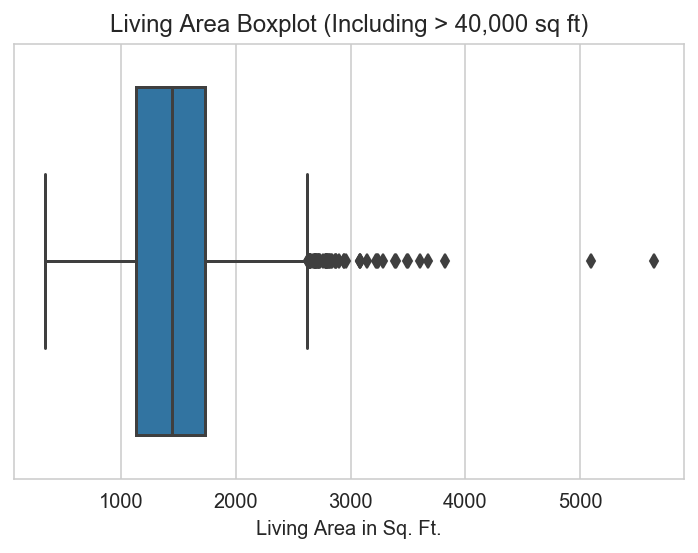

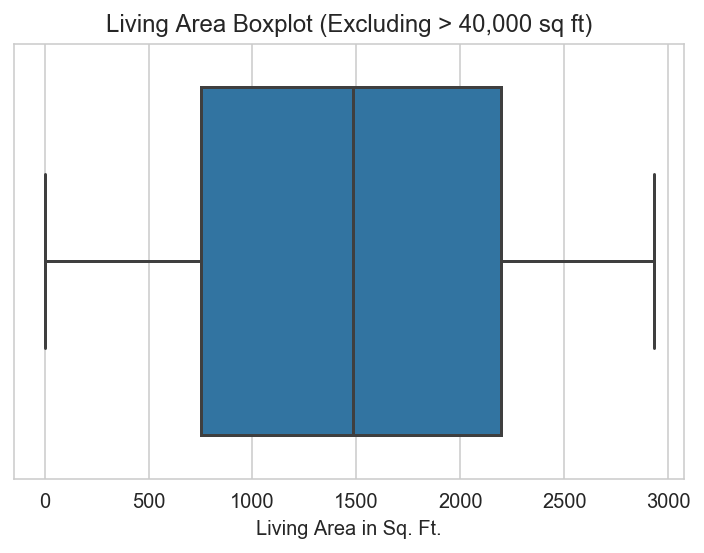

In [81]:
# Analyze original training data distribution of 'gr_liv_area'
sns.boxplot(train['gr_liv_area'])
plt.title('Living Area Boxplot (Including > 40,000 sq ft)')
plt.xlabel('Living Area in Sq. Ft.')
plt.show()


# Remove gr_liv_areas that are greater than 40_000 sq ft
train['gr_liv_area'] = train[train['gr_liv_area'] < 40_000]

# Find the mean of the col without the two outliers
liv_area_mean = train['gr_liv_area'].mean()
# Fill in two missing values corresponding with dropping outliers 
train['gr_liv_area'].fillna(liv_area_mean, inplace=True)

# Analyze distribution of 'gr_liv_area' now that you've removed large outliers
sns.boxplot(train['gr_liv_area'])
plt.title('Living Area Boxplot (Excluding > 40,000 sq ft)')
plt.xlabel('Living Area in Sq. Ft.')
plt.show()


### Feature Engineering

Since `pool_qc` has 2041 missing values that represent that a house has no pool, it makes sense to create `has_pool` dummy column where 1 indicates that a house has a pool and 0 indicates that it does not have a pool.

In [82]:
# Create new column 
# Replace old dictionary values with either 1 or 0
train['has_pool'] = train['pool_qc'].replace({3:1, 1:1, 2:1, 4:1, 0:0})
# Check that it worked 
train['has_pool'].value_counts()

0    2041
1       9
Name: has_pool, dtype: int64

Since location factors greatly into the sale price of a home, dummy-fying the categorical `neighborhood` column is a rational approach.

- Define a function `format_neighborhood(neighborhood):` that groups neighborhoods into 'other' category if the neighborhood has less than 10 observations. This step is necessart so that there is no inconsistency with the training data and the testing data when `test_train_split()` is applied and a neighborhood only appears once.
- Once neighborhoods are grouped, use `pd.get_dummies` on `neighborhood` column.
- Drop `'neighborhood_Names'` to use as reference column because it has the highest value count.


In [83]:
# Check which neighborhoods have less than 10 observations
train['neighborhood'].value_counts()

# groups neighborhoods into 'other' category if the neighborhood has less than 10 observations
def format_neighborhood(neighborhood):
    if neighborhood == 'NPkVill' or neighborhood == 'Veenker' or neighborhood == 'Blueste' or neighborhood == 'Greens' or neighborhood ==  'GrnHill' or neighborhood == 'Landmrk':
        return 'other'
    else:
        return neighborhood

# apply function
train['neighborhood'] = train['neighborhood'].apply(format_neighborhood)

# dummy neighborhood column
train = pd.get_dummies(train, columns=['neighborhood'])

# drop reference dummy column
train.drop(columns='neighborhood_NAmes', inplace=True)

Since there are now too many neighborhood columns to add manually, find all the columns that have 'neighborhood' in them by iterating through columns. Add these columns to a list `neighborhood_cols` that will later be appended to the features.

In [84]:
neighborhood_cols = [col for col in train.columns if 'neighborhood' in col]

Since the number of bedrooms and bathrooms in a house should ideally be proportional, create a `bed_bath_ratio` interaction column that calculates the ratio of bedrooms to bathrooms for a house.

In [85]:
# Create new interaction column
train['bed_bath_ratio'] = train['bedroom_abvgr']/train['full_bath']

# Fill missing values with 0 (divided ==> 0/0)
train['bed_bath_ratio'].fillna(0, inplace=True)

# Fill inf values with 0 (divided ==> number/0)
train['bed_bath_ratio'].replace(np.inf, 0, inplace=True)

Based on the correlation between sale price and overall, overall condition had the strongest correlation with saleprice. Create and interaction column that multiplies the two columns.

In [86]:
# Create new interaction column
train['overall_cond_bed_bath'] = train['overall_cond'] * train['bed_bath_ratio']

Garage quality and the number of cars that fit in a garage are two features that are relate, so create an interaction column that factors in the affect of both features together.

In [87]:
train['garage_qual_cars'] = train['garage_qual'] * train['garage_cars']

Double check that there are no `NaN` values.

In [88]:
train.isnull().sum().sort_values(ascending = False).head(30)

garage_qual_cars         0
mas_vnr_area             0
exter_cond               0
foundation               0
bsmt_qual                0
bsmt_cond                0
bsmt_exposure            0
bsmtfin_type_1           0
bsmtfin_sf_1             0
bsmtfin_type_2           0
bsmtfin_sf_2             0
bsmt_unf_sf              0
total_bsmt_sf            0
heating                  0
heating_qc               0
central_air              0
electrical               0
1st_flr_sf               0
2nd_flr_sf               0
low_qual_fin_sf          0
gr_liv_area              0
bsmt_full_bath           0
bsmt_half_bath           0
full_bath                0
half_bath                0
exter_qual               0
mas_vnr_type             0
overall_cond_bed_bath    0
exterior_2nd             0
pid                      0
dtype: int64

### Pickle

In [89]:
pickle.dump(train, open("../pickles/train_clean.pkl", "wb"))

Save clean train data.

In [68]:
train.to_csv('../datasets/clean_train.csv')